In [37]:
from gridspectra import *

In [46]:
# instantiate gridspectra class for reading in 21cmFAST grids and calculating power spectra 
gs = gridspectra(boxsize=750.0,test=False)

In [39]:
# load 3D density contrast delta from 21cmFAST output file
delta = gs.loadgrid('updated_smoothed_deltax_z009.57_400_750Mpc') 

In [40]:
# load 3D ionized fraction x from 21cmFAST output file
x = gs.loadgrid('xH_nohalos_z006.55_nf0.058935_eff20.0_HIIfilter1_Mmin4.1e+08_RHIImax15_400_750Mpc')

In [41]:
# load 3D 21cm spin temperature Ts from 21cmFAST output file
Ts = gs.loadgrid('Ts_z016.01_zetaX1.0e+56_alphaX1.2_TvirminX2.0e+04_zetaIon20.00_Pop2_400_750Mpc')

In [42]:
# load 3D 21cm differential brightness temperature Tb from 21cmFAST output file
Tb = gs.loadgrid('delta_T_v3_no_halos_z016.01_nf0.990244_useTs1_zetaX1.0e+56_alphaX1.2_TvirminX2.0e+04_aveTb-136.71_Pop2_400_750Mpc')

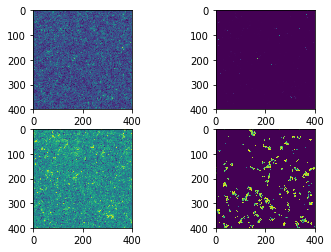

In [44]:
# show slices of delta, Ts, Tb, and x
plt.subplot(2,2,1); plt.imshow(delta[:,:,0]); 
plt.subplot(2,2,2); plt.imshow(Ts[:,:,0]); 
plt.subplot(2,2,3); plt.imshow(Tb[:,:,0]);
plt.subplot(2,2,4); plt.imshow(x[:,:,0])

In [51]:
# get cross powers of delta and Tb and normalize
k,p_dd,p_bb,p_db = gs.power(delta,Tb)
p_bb /= Tb.mean()**2; p_db /= Tb.mean()

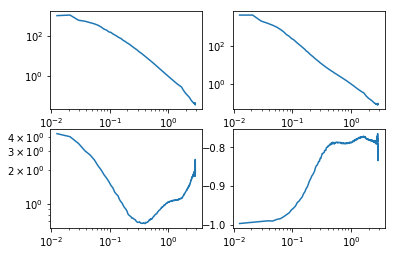

In [56]:
# plot the power spectra and cross-correlation coefficient 
plt.subplot(2,2,1); plt.loglog(k,p_dd);
plt.subplot(2,2,2); plt.loglog(k,p_bb);
plt.subplot(2,2,3); plt.loglog(k,p_bb/p_dd);
plt.subplot(2,2,4); plt.semilogx(k,p_db/np.sqrt(p_dd*p_bb));